# Sahil Sheikh
## CWID: A20518693
## Subject:CS 577
## Semester: FALL 22
## ASSIGNMENT 5
IMDB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Embedding
from keras.utils.data_utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.datasets import imdb

## Function to load IMDB dataset from keras

In [2]:
def load_data():
    maxlen = 300
    (train_x, train_y),(test_x, test_y) = imdb.load_data(num_words=10000,skip_top=0)
    print(train_x.shape)
    print(test_x.shape)
    train_x = pad_sequences(train_x, maxlen=maxlen)
    test_x = pad_sequences(test_x, maxlen=maxlen)
    train_x,vali_x,train_y,vali_y = train_test_split(train_x,train_y, test_size=0.2)
    
    return train_x,train_y,vali_x,vali_y,test_x,test_y

In [3]:
#call function to load dataset and return the req variables
train_x, train_y, vali_x, vali_y, test_x, test_y = load_data()

(25000,)
(25000,)


In [4]:
type(train_x)

numpy.ndarray

In [5]:
type(train_y)

numpy.ndarray

In [111]:
print('Training data shape:',train_x.shape)
print('Training label shape:',train_y.shape)

Training data shape: (20000, 300)
Training label shape: (20000,)


In [23]:
print('Testing data shape:',test_x.shape)
print('Testing label shape:',test_y.shape)
print('Vali data shape:',vali_x.shape)
print('Vali label shape:',vali_y.shape)

Testing data shape: (25000, 300)
Testing label shape: (25000,)
Vali data shape: (5000, 300)
Vali label shape: (5000,)


In [24]:
def model_1():
    model = tf.keras.Sequential([
        keras.layers.Embedding(10000,64,input_length=300),
        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics = ['acc'])
    return model

In [25]:
def model_2():
    model = tf.keras.Sequential([
        keras.layers.Embedding(10000,64,input_length=300),
        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics = ['acc'])
    return model

In [29]:
def plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model Loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    plt.show()
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    plt.show()
    return 0

## Training First model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 64)           640000    
                                                                 
 flatten_3 (Flatten)         (None, 19200)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                1228864   
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,868,929
Trainable params: 1,868,929
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
157/157 [==============================] - 1s 6ms/step - loss: 0.4907 - acc: 0.7395 - val_loss: 0.3224 - val_acc: 0.8550
Epoch 2/5
157/157 [==========================

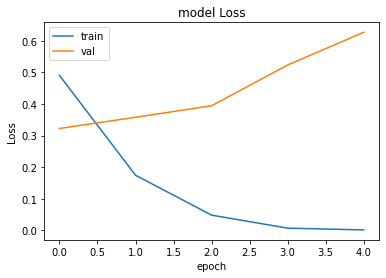

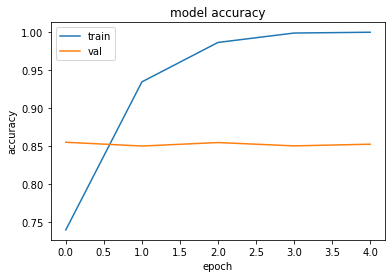

0

In [33]:
epoch = 5
b_size = 128
model1_ep5 = model_1()
model1_ep5.summary()
results2 = model1_ep5.fit(train_x,train_y,epochs=epoch, validation_data=(vali_x,vali_y),batch_size=b_size)
plot(results2)

## Evaluation of results

In [90]:
loss,acc = model1.evaluate(test_x,test_y, verbose=1)
print('Test accuracy of model is ', (acc)*100,'%')

782/782 [==============================] - 2s 2ms/step - loss: 1.4475 - acc: 0.8308
Test accuracy of model is  83.0839991569519 %


In [ ]:
## Training 2nd model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 300, 64)           640000    
                                                                 
 flatten_5 (Flatten)         (None, 19200)             0         
                                                                 
 dense_10 (Dense)            (None, 64)                1228864   
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,868,929
Trainable params: 1,868,929
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
157/157 [==============================] - 1s 5ms/step - loss: 0.6929 - acc: 0.5106 - val_loss: 0.6927 - val_acc: 0.5080
Epoch 2/5
157/157 [==========================

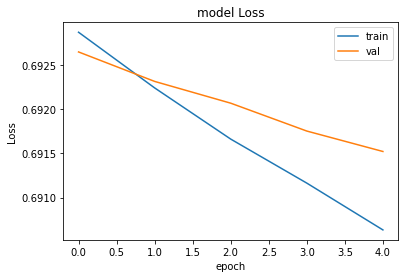

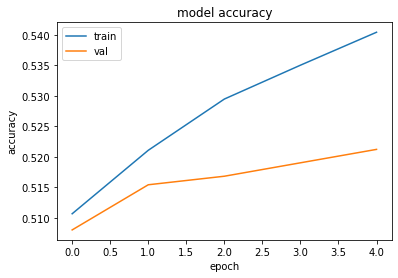

0

In [35]:
epoch = 5
b_size = 128
model2 = model_2()
model2.summary()
results3 = model2.fit(train_x,train_y,epochs=epoch, validation_data=(vali_x,vali_y),batch_size=b_size)
plot(results3)

## From the results we can observe model 1 performs better than model 2
So we save the weights of first model

In [36]:
model1_ep5.save('Model_imdb.h5')
model1_ep5.save_weights('Model_imdn_weights.h5')

We will make of glove and load the raw data IMDB dataset from the file we downloaded

In [129]:
#loading imdb dataset raw
import os
data_dir = 'C:/Users/sahil/Downloads/aclImdb_data/aclImdb/'
train_dir = os.path.join(data_dir, 'train')
labels = []
texts = []
for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name,fname),encoding="utf8")
            texts.append(f.read())
            f.close()
        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)


In [39]:
print(len(labels))

25000


In [40]:
print(len(texts))

25000


Tokenizing the raw data from IMDB dataset

In [130]:
from keras.preprocessing.text import Tokenizer
maxlen = 300
training_samples = 20000
validation_samples = 1000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Unique token found:', len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)


Unique token found: 88582


In [131]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_vali = data[training_samples: training_samples +validation_samples]
y_vali = labels[training_samples: training_samples +validation_samples]

In [122]:
print(data[0])

[   2 4331   10   89  388  135   11 2385  198   97   21 5260  728 5894
   10  241  249   11 2385  198   66    3   49  853    4  275    5   94
    3   49 2385  198   18  469  139  212   21   25    7    7   15 1823
   11 1265   47   68  104  669  616    1   83  571    3  186   62  561
   34 6410    3  428 1307   31   32 1739   34 2535 1715    1  561  775
    5   64 1440    8    1  428   14   26    6 1949  544 3136   26 2881
  242    1 3371   18    9  938 3251  747   87   79    1 3226    4   32
 2264    8   12  428    6  878   81    2    6   43    5  513   87   10
   77   21   57  757    1  330  387   15   11 1265 1234 2814    2   65
   85    9   13   57   50  354   71   11  387    7    7   11  861    6
  218    2   35    1   62  141   27   49   18  100  316    9   10   13
 3581   85   47   68   96  108 7267    8    1   62   14   70   14   12
   13  616   12  119  161    5  335    1   62  100    1  233  133   10
   13  314   16   50 1202   71 2765    7    7   10  800   15  339 2478
    5 

In [74]:
x_test = data[training_samples+validation_samples:]
y_test = labels[training_samples+validation_samples:]

In [75]:
print(x_train.shape)

(20000, 300)


In [77]:
print(x_vali.shape)

(1000, 300)


In [78]:
print(x_test.shape)

(4000, 300)


Loading the glove file and convert it into embedding matrix

In [132]:
glove_file = 'C:/Users/sahil/Downloads/glove.6B'

embedding_index = {}
f = open(os.path.join(glove_file,'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs
f.close()
print("Found %s word vectors." % len(embedding_index))


Found 400000 word vectors.


In [135]:
embedding_dim = 64
embedding_matrix = np.zeros((max_words, embedding_dim))
print(embedding_matrix.shape)
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

(10000, 64)


In [59]:
from keras.models import Sequential 
from keras.layers import Embedding, Flatten, Dense

In [60]:
print(max_words)

10000


## Creating model with Embedding matrix

In [117]:
model_Em = Sequential()
model_Em.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_Em.add(Flatten())
model_Em.add(Dense(64,activation='relu'))
model_Em.add(Dense(1,activation='sigmoid'))
model_Em.summary()
model_Em.layers[0].set_weights([embedding_matrix])
model_Em.layers[0].trainable = False

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 300, 64)           640000    
                                                                 
 flatten_10 (Flatten)        (None, 19200)             0         
                                                                 
 dense_19 (Dense)            (None, 64)                1228864   
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,868,929
Trainable params: 1,868,929
Non-trainable params: 0
_________________________________________________________________


In [118]:
model_Em.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics = ['acc'])

In [119]:
def plot_2(history):
    acc = history.history['acc']
    loss = history.history['loss']
    val_acc =history.history['val_acc']
    val_loss =history.history['val_loss']
    epochs=range(1,len(acc)+1)
    plt.plot(epochs,acc,'bo',label='training acc')
    plt.plot(epochs,acc,'g',label='training acc')
    plt.plot(epochs,val_acc,'b',label='validation acc')
    plt.title('Training and validation acc')
    plt.legend()
    plt.show()
    plt.plot(epochs,loss,'bo',label='training loss')
    plt.plot(epochs,loss,'g',label='training loss')
    plt.plot(epochs,val_loss,'b',label='validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    return 0

Training of model

In [120]:
history = model_Em.fit(x_train, y_train, epochs=10,validation_data=(x_val,y_val), batch_size=32, verbose=1)

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6932 - acc: 0.4999 - val_loss: 0.6934 - val_acc: 0.4780
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6932 - acc: 0.4958 - val_loss: 0.6931 - val_acc: 0.5220
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6931 - acc: 0.5052 - val_loss: 0.6928 - val_acc: 0.5220
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6932 - acc: 0.4990 - val_loss: 0.6928 - val_acc: 0.5220
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6932 - acc: 0.5027 - val_loss: 0.6926 - val_acc: 0.5220
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6932 - acc: 0.5012 - val_loss: 0.6929 - val_acc: 0.5220
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6932 - acc: 0.5009 - val_loss: 0.6930 - val_acc: 0.5220
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

Plotting the graphs 

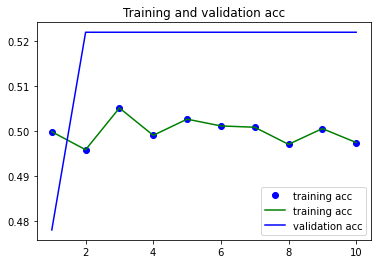

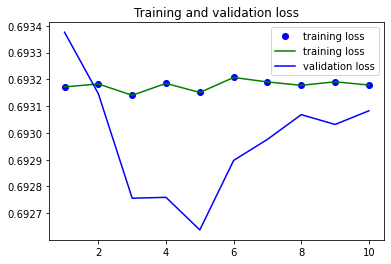

0

In [121]:
plot_2(history)

Saving the model aand evaluating the results of the model

In [83]:
model_Em.save_weights('Embedding_layer_weights.h5')

In [92]:
loss,acc = model_Em.evaluate(x_test,y_test, verbose=1)
print('Test accuracy of model is ', (acc)*100,'%')

125/125 [==============================] - 0s 3ms/step - loss: 0.6932 - acc: 0.4988
Test accuracy of model is  49.87500011920929 %


## Creating a model with LTSM layer

In [86]:
from keras.layers import LSTM 
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(62))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 300, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 62)                31496     
                                                                 
 flatten_9 (Flatten)         (None, 62)                0         
                                                                 
 dense_18 (Dense)            (None, 1)                 63        
                                                                 
Total params: 671,559
Trainable params: 671,559
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics = ['acc'])

## Training and plotting of graphs

Epoch 1/10
625/625 [==============================] - 13s 16ms/step - loss: 0.6935 - acc: 0.4963 - val_loss: 0.6928 - val_acc: 0.4810
Epoch 2/10
625/625 [==============================] - 9s 15ms/step - loss: 0.6802 - acc: 0.5732 - val_loss: 0.6541 - val_acc: 0.6410
Epoch 3/10
625/625 [==============================] - 9s 15ms/step - loss: 0.6259 - acc: 0.6471 - val_loss: 0.5985 - val_acc: 0.6890
Epoch 4/10
625/625 [==============================] - 9s 15ms/step - loss: 0.5604 - acc: 0.7128 - val_loss: 0.5138 - val_acc: 0.7430
Epoch 5/10
625/625 [==============================] - 9s 15ms/step - loss: 0.4942 - acc: 0.7588 - val_loss: 0.4730 - val_acc: 0.7870
Epoch 6/10
625/625 [==============================] - 10s 15ms/step - loss: 0.4271 - acc: 0.8029 - val_loss: 0.4164 - val_acc: 0.8170
Epoch 7/10
625/625 [==============================] - 9s 14ms/step - loss: 0.3636 - acc: 0.8407 - val_loss: 0.3796 - val_acc: 0.8440
Epoch 8/10
625/625 [==============================] - 9s 15ms/step 

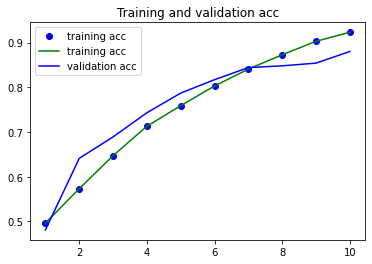

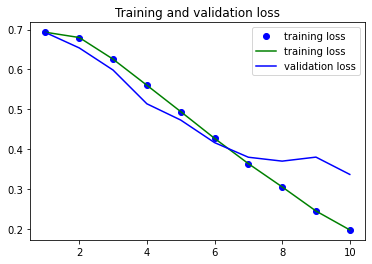

0

In [93]:
history2 = model.fit(x_train, y_train, epochs=10,validation_data=(x_val,y_val), batch_size=32, verbose=1)
plot_2(history2)

## Evaluating the performance and saving weights

In [94]:
loss,acc = model.evaluate(x_test,y_test, verbose=1)
print('Test accuracy of model is ', (acc)*100,'%')

125/125 [==============================] - 1s 9ms/step - loss: 0.3800 - acc: 0.8712
Test accuracy of model is  87.12499737739563 %


In [97]:
model.save_weights('lstm_model.h5')